<a href="https://colab.research.google.com/github/angelaomo/Customer_Segmentation/blob/main/new_customer_segmentation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import numpy as np import pandas as pd import matplotlib.pyplot as plt import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/archive (2)/Train.csv")

df.head(2)





,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A


In [ ]:
#finding the number of rows and columns
df.shape

(8068, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
#check for missing values
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
# Replace null values in numeric columns with mean or median

df['Work_Experience'].fillna(df['Work_Experience'].mean(), inplace=True)


# Replace null values in 'Family_Size' column with the median value of the column
df['Family_Size'].fillna(df['Family_Size'].median(), inplace=True)
# Replace null values in specific columns with a placeholder value, for example 'Unknown'
df['Ever_Married'].fillna('Unknown', inplace=True)
df['Graduated'].fillna('Unknown', inplace=True)
df['Profession'].fillna('Unknown', inplace=True)
df['Var_1'].fillna('Unknown', inplace=True)

In [ ]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000,8068.000000
mean,463479.214551,43.466906,2.641663,2.856346
std,2595.381232,16.711696,3.226972,1.499577
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
# Check for and remove duplicate rows
df.drop_duplicates(inplace=True)



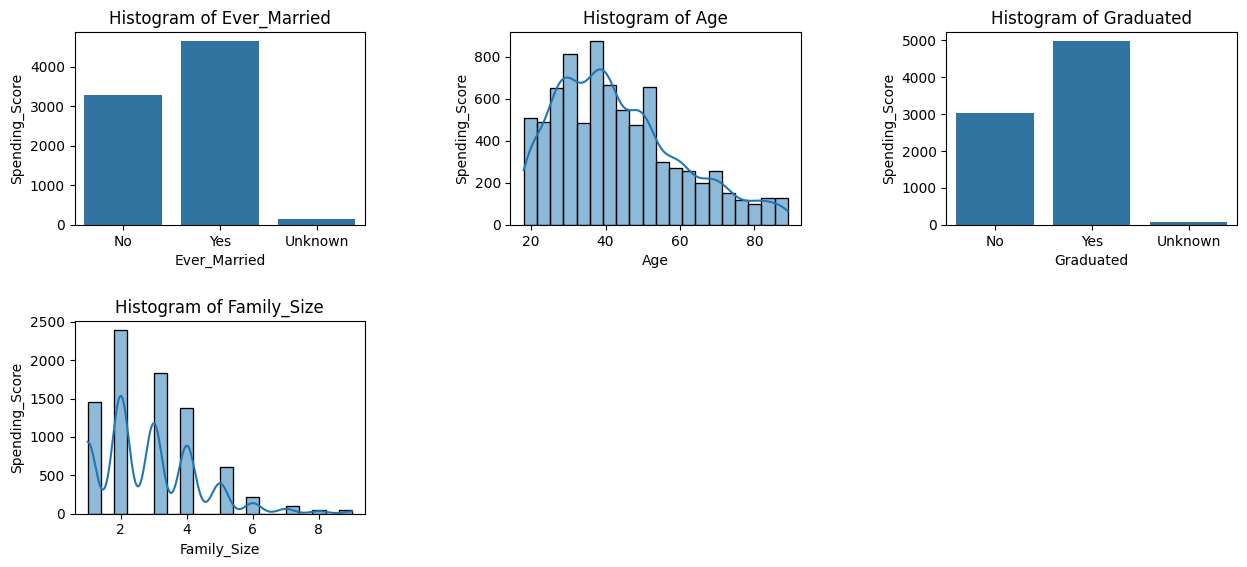

In [ ]:


plt.figure(figsize=(15, 10))

features = ['Ever_Married', 'Age', 'Graduated','Family_Size']

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    if feature == 'Age' or feature == 'Gender' or feature == 'Family_Size':
        sns.histplot(df[feature], bins=20, kde=True)
    else:
        sns.countplot(data=df, x=feature)
    plt.title('Histogram of {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Spending_Score')

plt.show()


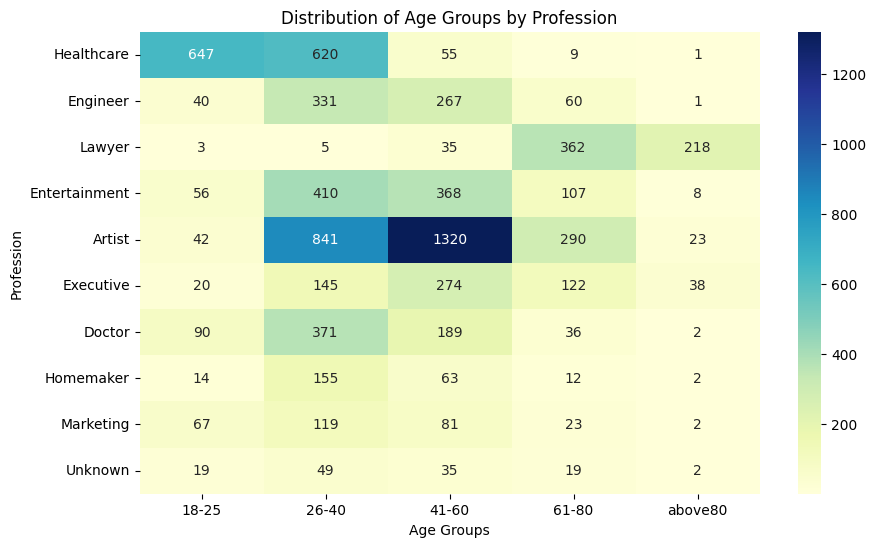

In [ ]:


# Define the age groups
ages = ['18-25', '26-40', '41-60', '61-80', 'above80']

# Count the number of individuals in each age group for each profession
counts = []
professions = df['Profession'].unique()

for profession in professions:
    count_profession = [
        len(df[(df.Age >= 18) & (df.Age <= 25) & (df.Profession == profession)]),
        len(df[(df.Age >= 26) & (df.Age <= 40) & (df.Profession == profession)]),
        len(df[(df.Age >= 41) & (df.Age <= 60) & (df.Profession == profession)]),
        len(df[(df.Age >= 61) & (df.Age <= 80) & (df.Profession == profession)]),
        len(df[(df.Age > 80) & (df.Profession == profession)])
    ]
    counts.append(count_profession)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(counts, annot=True, fmt="d", cmap="YlGnBu", xticklabels=ages, yticklabels=professions)
plt.xlabel('Age Groups')
plt.ylabel('Profession')
plt.title('Distribution of Age Groups by Profession')
plt.show()


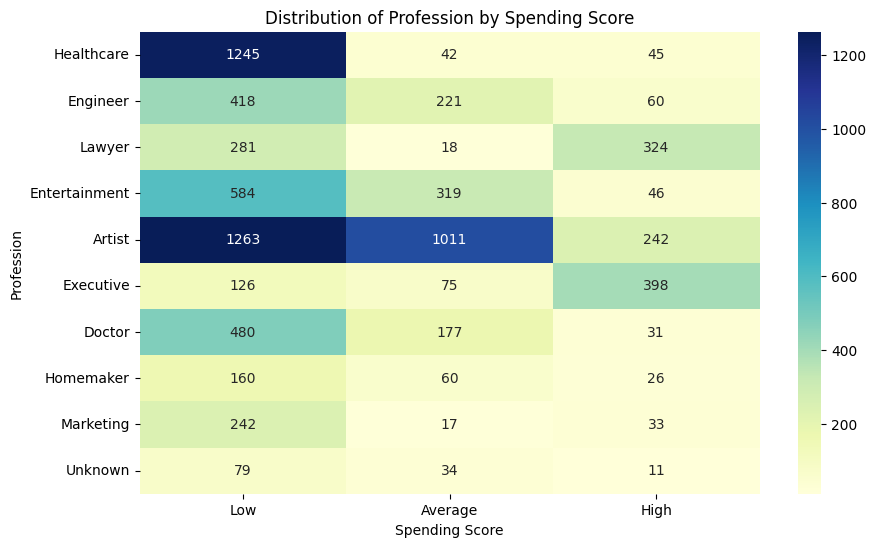

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique professions and spending scores
professions = df['Profession'].unique()
spending_scores = df['Spending_Score'].unique()

# Initialize counts matrix
counts = np.zeros((len(professions), len(spending_scores)), dtype=int)

# Count the number of individuals in each profession for each spending score category
for i, profession in enumerate(professions):
    for j, score in enumerate(spending_scores):
        counts[i, j] = len(df[(df['Profession'] == profession) & (df['Spending_Score'] == score)])

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(counts, annot=True, fmt="d", cmap="YlGnBu", xticklabels=spending_scores, yticklabels=professions)
plt.xlabel('Spending Score')
plt.ylabel('Profession')
plt.title('Distribution of Profession by Spending Score')
plt.show()


In [ ]:
df.drop(["ID"],axis=1,inplace=True)

In [ ]:
#X1=df.loc[:,['Age','Spending_Score']].values

In [ ]:
# Mapping dictionary
spending_score_mapping = {'Low': 0, 'Average': 1, 'High': 2}

# Create new column 'Spending_Scores' by mapping original categories to numerical values
df['Spending_Scores'] = df['Spending_Score'].map(spending_score_mapping)

print(df.head())

   Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0    Male           No   22        No     Healthcare         1.000000   
1  Female          Yes   38       Yes       Engineer         2.641663   
2  Female          Yes   67       Yes       Engineer         1.000000   
3    Male          Yes   67       Yes         Lawyer         0.000000   
4  Female          Yes   40       Yes  Entertainment         2.641663   

  Spending_Score  Family_Size  Var_1 Segmentation  Spending_Scores  
0            Low          4.0  Cat_4            D                0  
1        Average          3.0  Cat_4            A                1  
2            Low          1.0  Cat_6            B                0  
3           High          2.0  Cat_6            B                2  
4           High          6.0  Cat_6            A                2  


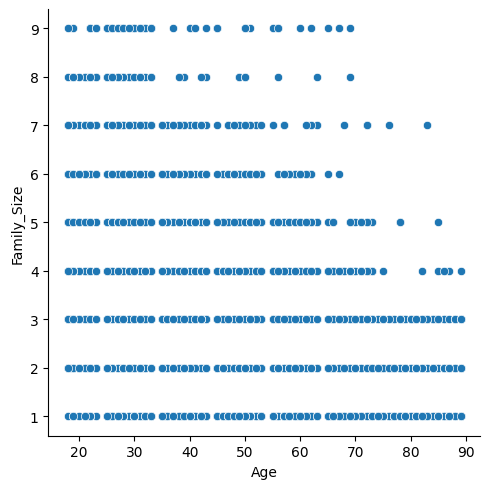

In [ ]:
# Create the relplot
sns.relplot(x="Age", y="Family_Size", data=df)


<ipython-input-39-6f5199ae3696>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="rocket")


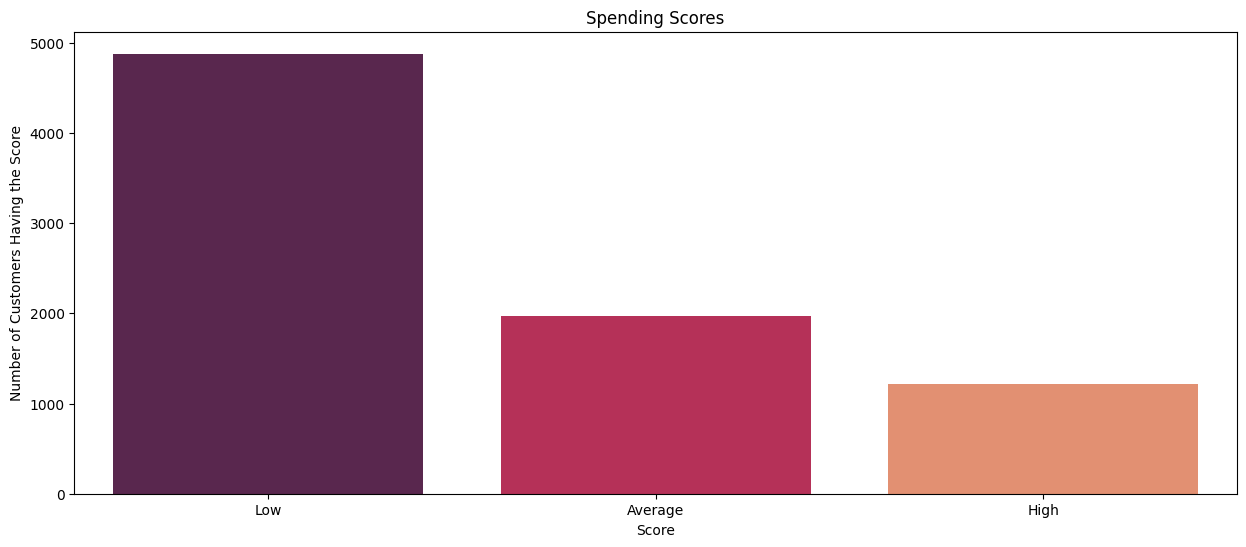

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of customers for each spending score
spending_score_counts = df['Spending_Score'].value_counts()

# Extract x and y data for plotting
ssx = spending_score_counts.index.tolist()
ssy = spending_score_counts.values.tolist()

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel('Number of Customers Having the Score')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

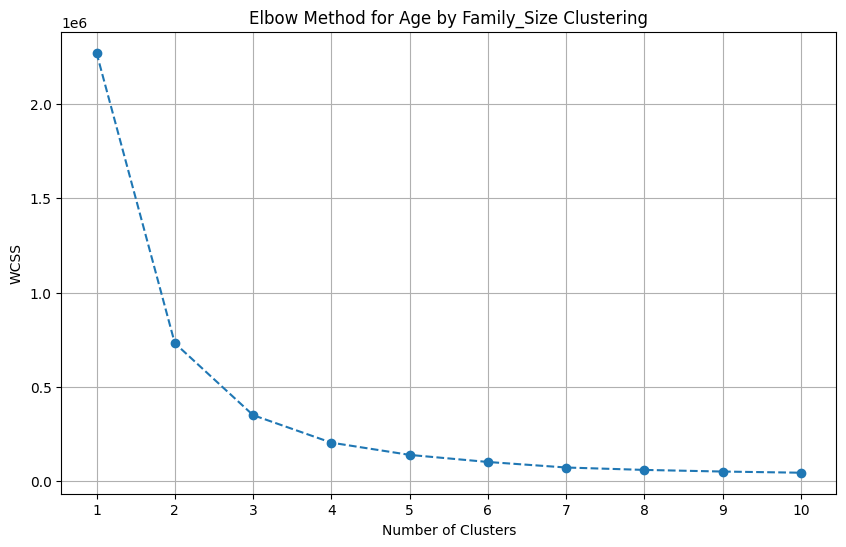

In [ ]:

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# Selecting the features (Age and Numerical Spending_Score)
X = df[['Family_Size',"Age"]].values

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Age by Family_Size Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

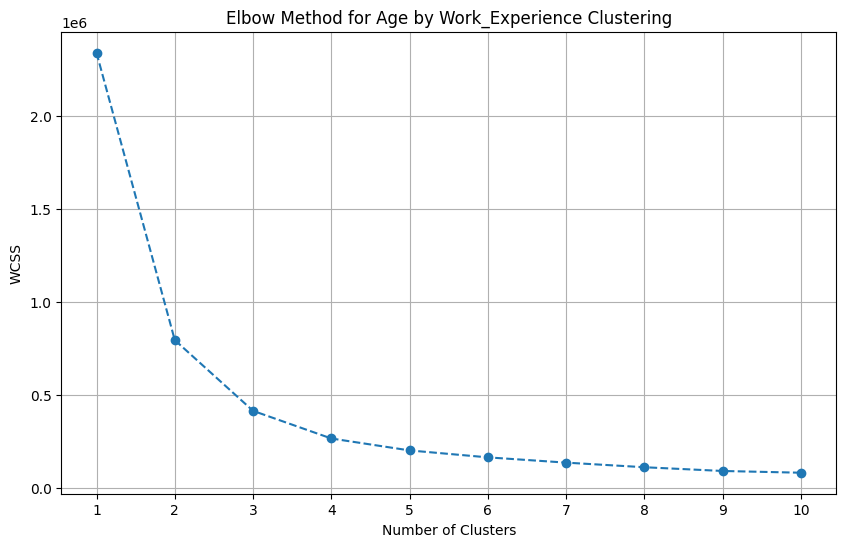

In [ ]:

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# Selecting the features (Age and Numerical Spending_Score)
X4= df[['Age', 'Work_Experience']].values

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X4_imputed = imputer.fit_transform(X4)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X4_imputed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Age by Work_Experience Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()




In [ ]:
X1=df.loc[:,["Age","Family_Size"]]

In [ ]:
from sklearn.cluster import KMeans

# Create a KMeans object with 4 clusters
kmeans = KMeans(n_clusters=4)

# Predict the label of clusters
labels = kmeans.fit_predict(X1)

# Print the labels
print(labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 2 ... 0 3 0]


In [ ]:
#view the centroids
print(kmeans.cluster_centers_)

[[39.23430799  2.62846004]
 [53.73509934  2.81966378]
 [74.78962002  2.09453197]
 [25.95489638  3.45713125]]


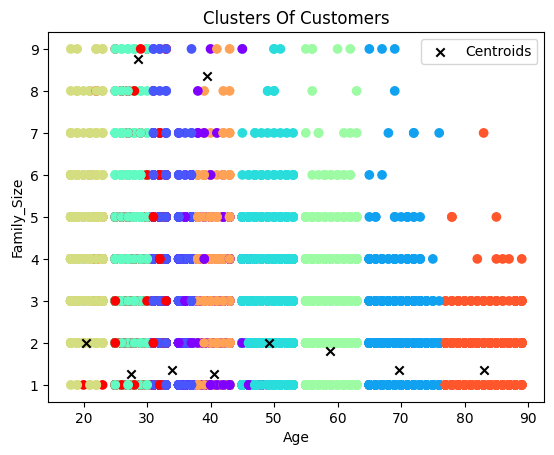

In [ ]:
#visualise the clusters
plt.scatter(X1.iloc[:, 0], X1.iloc[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('Clusters Of Customers')
plt.xlabel('Age')
plt.ylabel('Family_Size')
plt.legend()
plt.show()


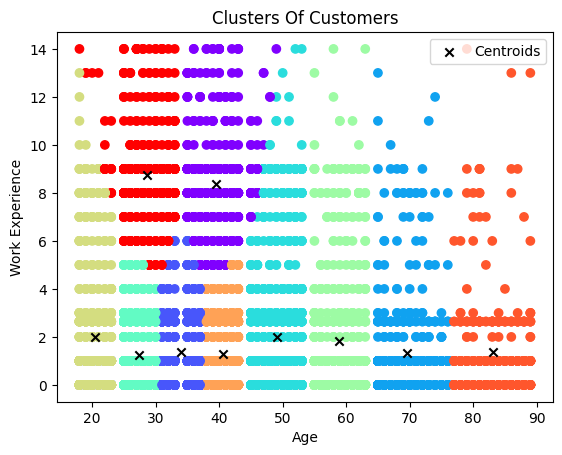

In [ ]:
plt.scatter(X4[:, 0], X4[:, 1], c=kmeans.labels_, cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', label='Centroids')
plt.title('Clusters Of Customers')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.legend()
plt.show()


In [ ]:
X3=df.iloc[:,1:]
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# Selecting the features (Age and Numerical Spending_Score)
X4= df[['Age', 'Work_Experience']].values

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X4_imputed = imputer.fit_transform(X4)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X4_imputed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Age by Work_Experience Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()




In [ ]:

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# Selecting the features (Age and Numerical Spending_Score)
X3 = df[['Age', 'Spending_Score']].values

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X3_imputed = imputer.fit_transform(X3)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Age by Spending_Score Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()




In [ ]:
df.head(1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

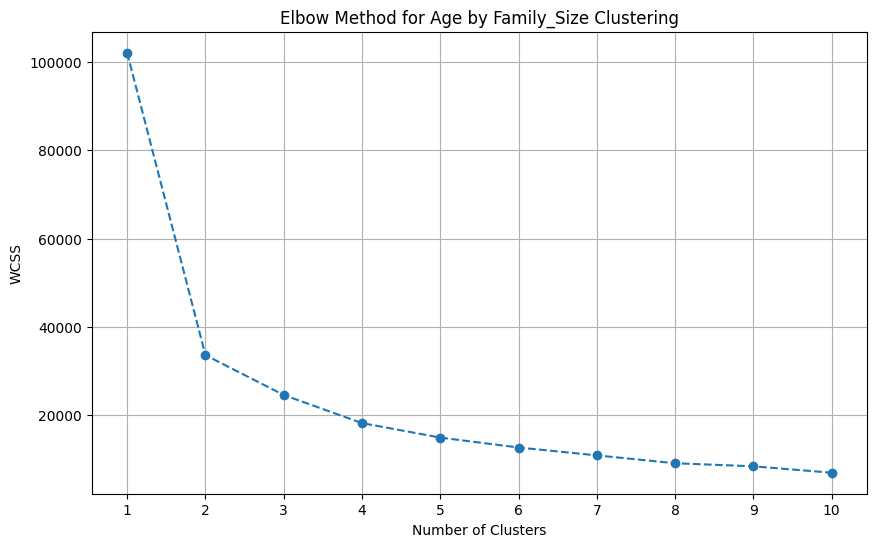

In [ ]:

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# Selecting the features (Age and Numerical Spending_Score)
X2 = df[['Work_Experience', 'Family_Size']].values

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X2_imputed = imputer.fit_transform(X2)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X2_imputed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Age by Family_Size Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()




In [ ]:
X1=df.loc[:,['Age','Spending_Scores']].values

In [ ]:
kmean=KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)

In [ ]:
print(kmeans.cluster_centers_)

In [ ]:
plt.scatter(X2[:0],X[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster Of Customers')
plt.xlabel('Age')
plt.ylabel('Spending_Scores')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Map spending score categories to numerical values
spending_score_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Spending_Score_Num'] = df['Spending_Score'].map(spending_score_mapping)

# Selecting the features (Age and Numerical Spending_Score)
X = df[['Age', 'Spending_Score_Num']].values

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Age by Spending_Score Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()




In [ ]:
kmeans=KMeans(n_clusters=4)
label=kmeans.predict(X1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Map spending score categories to numerical values
spending_score_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Spending_Score_Num'] = df['Spending_Scores'].map(spending_score_mapping)

# Selecting the features (Age and Numerical Spending_Score)
X = df[['Age', 'Spending_Score_Num']].values

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Age by Spending_Score Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


In [ ]:
# Mapping dictionary
spending_score_mapping = {'Low': 0, 'Average': 1, 'High': 2}

# Create new column 'Spending_Scores' by mapping original categories to numerical values
df['Spending_Scores'] = df['Spending_Score'].map(spending_score_mapping)

print(df)

In [ ]:
df.head()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Encoding categorical variables
label_encoder = LabelEncoder()
df['Spending_Score_Encoded'] = label_encoder.fit_transform(df['Spending_Score'])

# Selecting features and imputing missing values
X = df[['Age', 'Spending_Score_Encoded']].values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Age by Spending_Score Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()
